## Data Exploration2

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_performance = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


In [4]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
students_performance.isnull().sum()

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
nonull_test_preparation_course    0
dtype: int64

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [46]:
for categorical_var in ['gender', 'race/ethnicity', 'parental level of education']:
    print('\n When the category is {} \n ...............and.................'.format(categorical_var))
    for scores in ['math score', 'reading score', 'writing score']:
        print('\n when the score is {} \n ..........................................'.format(scores))
        for i in range(0, len(students_performance[categorical_var].unique())):
            for j in range(i + 1, len(students_performance[categorical_var].unique())):
                print('The t-test between the categories {} and {}'.format(students_performance[categorical_var].unique()[i]
                                                                       ,students_performance[categorical_var].unique()[j]))
                statistic = ttest_ind(students_performance[students_performance[categorical_var] == students_performance[categorical_var].unique()[i]][scores]
                                                    ,students_performance[students_performance[categorical_var] == students_performance[categorical_var].unique()[j]][scores])
                print(statistic)
                if statistic[1] > 0.05:
                    print(' ...... there is no significant difference in the means of {} and {}......'.format(students_performance[categorical_var].unique()[i]
                                                                                    ,students_performance[categorical_var].unique()[j]))


 When the category is gender 
 ...............and.................

 when the score is math score 
 ..........................................
The t-test between the categories female and male
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)

 when the score is reading score 
 ..........................................
The t-test between the categories female and male
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)

 when the score is writing score 
 ..........................................
The t-test between the categories female and male
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)

 When the category is race/ethnicity 
 ...............and.................

 when the score is math score 
 ..........................................
The t-test between the categories group B and group C
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
 ...... there is no significant difference

Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
The t-test between the categories bachelor's degree and high school
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
The t-test between the categories bachelor's degree and some high school
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
The t-test between the categories some college and master's degree
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
The t-test between the categories some college and associate's degree
Ttest_indResult(statistic=-0.7615968643953912, pvalue=0.44670316603036575)
 ...... there is no significant difference in the means of some college and associate's degree......
The t-test between the categories some college and high school
Ttest_indResult(statistic=4.488520877492127, pvalue=9.275017802620877e-06)
The t-test between the categories some college and some high school
Ttest_indResult(statistic=2.5757211403

2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [47]:
students_performance['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

lets check if there is any difference in performance in exams for the two different lunch types;

In [49]:
print(ttest_ind(students_performance[students_performance['lunch'] == 'standard'][['math score'
                                                                                  , 'reading score'
                                                                                  , 'writing score']]
               ,students_performance[students_performance['lunch'] == 'free/reduced'][['math score'
                                                                                  , 'reading score'
                                                                                  , 'writing score']]))

Ttest_indResult(statistic=array([11.83718047,  7.45105647,  8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))


From the T-test p-values result on the above we can understand that feeding the students different types of lunch have a significant effect on the students performance in the three scores from math, reading and writing.

3. Does the test preparation course seem to have an effect on the exam performances?

In [50]:
students_performance['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

first since the 'none' category will be treated as 'nan' lets redefine it and change its name to differenciate it from 'nan'.Lets replace 'none' with not completed.

In [62]:
students_performance['nonull_test_preparation_course'] = students_performance['test preparation course'].str.replace('none', 'not_completed')
students_performance['nonull_test_preparation_course'].unique()

array(['not_completed', 'completed'], dtype=object)

In [63]:
print(ttest_ind(students_performance[students_performance['nonull_test_preparation_course'] == 'completed'][['math score'
                                                                                  , 'reading score'
                                                                                  , 'writing score']]
               ,students_performance[students_performance['nonull_test_preparation_course'] == 'not_completed'][['math score'
                                                                                  , 'reading score'
                                                                                  , 'writing score']]))

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))


From the Ttest p_values result in the above there is a signifficant effect on the three scores whether a student completed a prep. course or not.

4. Which 2 exam scores are most correlated with each other?

we can answer this question using the correlation function(.corr()) or ussing visualization function .heatmap() in seaborn.

In [71]:
correlations = students_performance.corr()

from the above correlation dataframe we can see that 'reading score' and 'writing score' have the highest correlation coefficient i.e 0.954598.

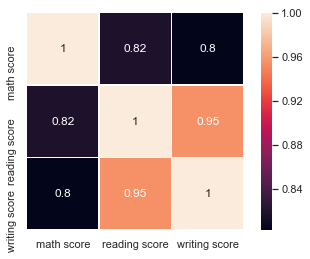

In [74]:
sns.heatmap(correlations, square=True, annot=True, linewidths=.5);

From the above heatmap plot we can see the orange colored is the highest value when we correlate two different variables('reading score','writing score') and it is rounded to 0.95.